In [1]:
# import des bibliotheques
# import bibliothéques d'analyse de python
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

import fonctions.perso_stats as perso_stats
import fonctions.perso_reg_lin as perso_reg_lin

In [2]:
# import des fichiers
ecole = pd.read_csv('donnee_temp/ecole.csv',dtype={'code_du_departement' : str,
                                                    'uai': str,
                                                    'nom_de_l_etablissment' : str,
                                                    'code_insee_de_la_commune': str,
                                                    'nom_de_la_commune': str})
                                                    
college = pd.read_csv('donnee_temp/college.csv',dtype={'code_insee_de_la_commune': str,
                                                                'part_presents_3eme_ordinaire_g' : str,
                                                                'part_presents_3eme_ordinaire_p': str,
                                                                'part_presents_3eme_segpa_total' : str})

In [3]:
# style graphe :
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [4]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32987 entries, 0 to 32986
Data columns (total 69 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                32987 non-null  int64  
 1   rentree_scolaire                          32987 non-null  int64  
 2   region_academique                         32982 non-null  object 
 3   academie                                  32982 non-null  object 
 4   departement                               32982 non-null  object 
 5   commune                                   32982 non-null  object 
 6   numero_college                            32982 non-null  object 
 7   denomination_principale                   32982 non-null  object 
 8   patronyme                                 32927 non-null  object 
 9   secteur                                   32982 non-null  object 
 10  rep                               

Dans la partie Analyse, il y a une colonne valeur ajoutée des colléges.<br>
Ce noteboook va tenter de refaire cette colonne.<br>
Selon la notice ils ont utilisé : 
<ul>
    <li>IPS : Indice de position Sociale</li>
    <li>le sexe des éléves</li>
    <li>les résultats des évaluation de sixieme</li>
    <li>les retards des élèves</li>
</ul>
Il ont prédit les résultats puis il ont fait la différences entre les prediction et les résultats réels.<br>
Je n ai accès que aux sexe et à l'IPS. Mais testons ça.<br>


In [5]:
# prepa donne en mode rache : les données ayant pas de resultats utre que 2022 + college sans donnée
college2022 = college[college['rentree_scolaire']==2022].copy()
college2022 = college2022[['va_de_la_note_g','3eme_filles','3eme_total','ips','note_a_l_ecrit_g','secteur','pourcentage_ulis_3ieme']]
college2022.dropna(inplace=True)

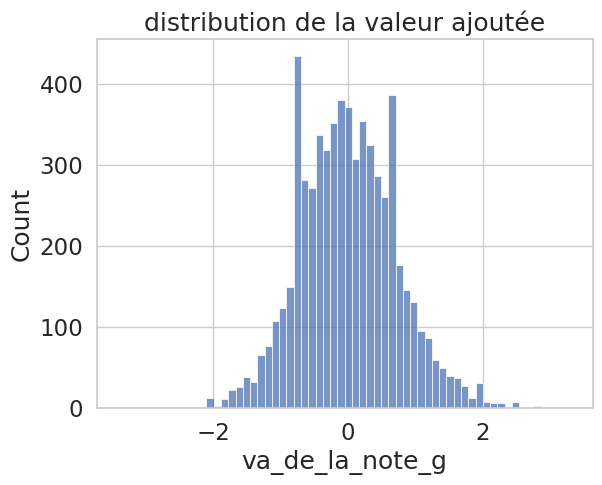

In [6]:
# distributon va de la note
fig,ax =plt.subplots()
sns.histplot(college2022,x='va_de_la_note_g',ax=ax)
ax.set_title('distribution de la valeur ajoutée')
plt.show()
del fig,ax

In [7]:
# test normalité valeur ajouté
rep = perso_stats.test_loi_normale(college2022['va_de_la_note_g'].sample(5000))
del rep



Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %


In [8]:
print('la valeur ajoutée maximale est de :',college2022['va_de_la_note_g'].max())

la valeur ajoutée maximale est de : 3.3


In [9]:
print('la valeur ajoutée minimale est de :',college2022['va_de_la_note_g'].min())

la valeur ajoutée minimale est de : -3.4


In [10]:
college2022.corr(numeric_only=True)

,va_de_la_note_g,3eme_filles,3eme_total,ips,note_a_l_ecrit_g,pourcentage_ulis_3ieme
va_de_la_note_g,1.000000,-0.080815,-0.094414,0.030355,0.473334,-0.064386
3eme_filles,-0.080815,1.000000,0.964755,0.190467,0.099319,-0.020277
3eme_total,-0.094414,0.964755,1.000000,0.183860,0.079144,-0.000154
ips,0.030355,0.190467,0.183860,1.000000,0.803449,-0.225480
note_a_l_ecrit_g,0.473334,0.099319,0.079144,0.803449,1.000000,-0.199600
pourcentage_ulis_3ieme,-0.064386,-0.020277,-0.000154,-0.225480,-0.199600,1.000000


La valeurs ajouté ne sont pas distribué de façon normale.

intercept (const dans statmodels) 2.4633929828401957
Coefficients: 
 [0.07677261]
Erreur des moindres carrés train : 0.83
Coefficient de determination train : 0.65
erreur max train:  4.12941985064848


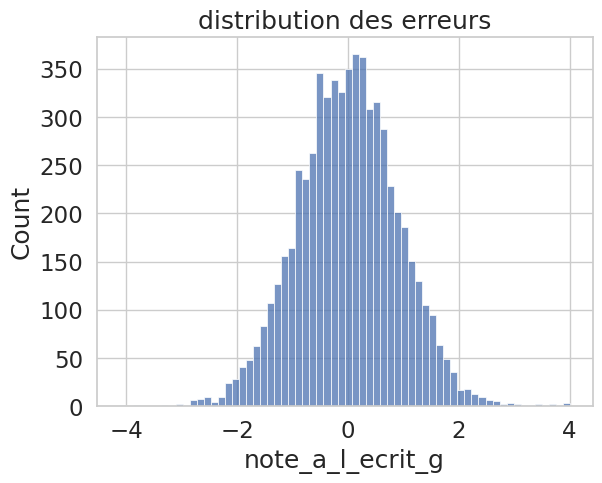


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.0 %




In [11]:
# test juste avec ips
data_reg_lin = college2022[['ips','note_a_l_ecrit_g']].copy()
reg_lin = perso_reg_lin.regression_lineaire(data=data_reg_lin,colonne_cible='note_a_l_ecrit_g',intercept=True)

Bon juste avec l'IPS on obtient déjà des resultats sympas : <br>
<ul>
<li>erreur des moindre carré : inférieur à 1 :globalement on est proche de la note réel.</li>
<li>erreurs max d'environ 4 points pas terrible dans certain cas</li>
</ul>
Si on compare rapidement avec les va des colleges :
<ul>
    <li>les erreurs de la valeur ajouté des notes ressemble étrangement au erreurs de la regression linéaire</li>
    <li>les erreurs max sont supérieures avec mon modéle.</li>
</ul>

Bon essayons d'amèliorrer la regression linéaire.

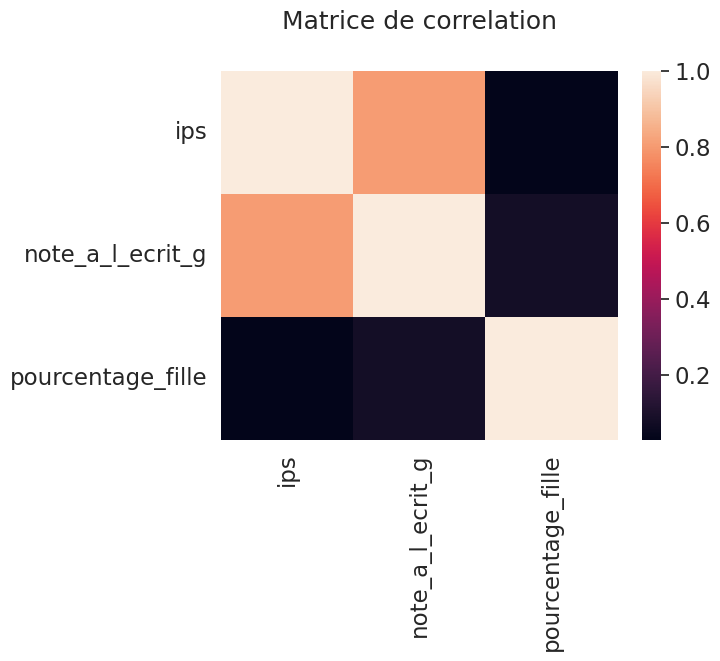

In [12]:
#regression lineaire avec le sexe des eleves + ips

college2022['pourcentage_fille'] = college2022['3eme_filles']/college2022['3eme_total']*100
data_reg_sex_ips = college2022[['ips','note_a_l_ecrit_g','pourcentage_fille']].copy()
fig,ax = plt.subplots()
sns.heatmap(data_reg_sex_ips.corr(),ax=ax)
ax.set_title('Matrice de correlation',pad=30)
plt.show()

<Axes: >

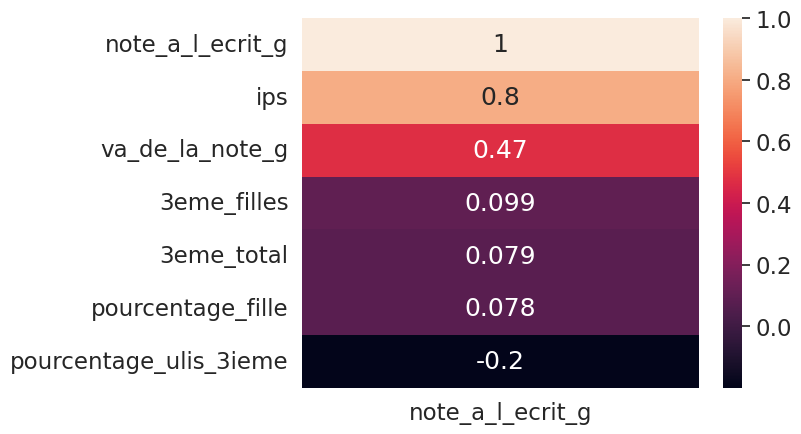

In [13]:
sns.heatmap(college2022.corr(numeric_only=True)[['note_a_l_ecrit_g']].sort_values(by='note_a_l_ecrit_g',ascending=False),annot=True)

intercept (const dans statmodels) 1.7703194954789332
Coefficients: 
 [0.07662427 0.0142987 ]
Erreur des moindres carrés train : 0.82
Coefficient de determination train : 0.65
erreur max train:  4.080859795446372


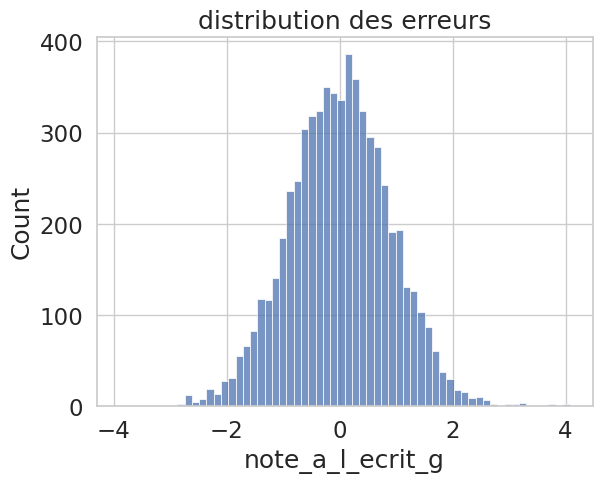


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  0.04 %




In [14]:
reg_lin_ips_sexe = perso_reg_lin.regression_lineaire(data=data_reg_sex_ips,colonne_cible='note_a_l_ecrit_g',intercept=True)

Le sexe des filles ne permets pas d'ameliorrer enormément le modéle. 

intercept (const dans statmodels) 1.8357047164882303
Coefficients: 
 [ 0.07629243 -0.01271069  0.01402858]
Erreur des moindres carrés train : 0.82
Coefficient de determination train : 0.65
erreur max train:  4.0971664274173545


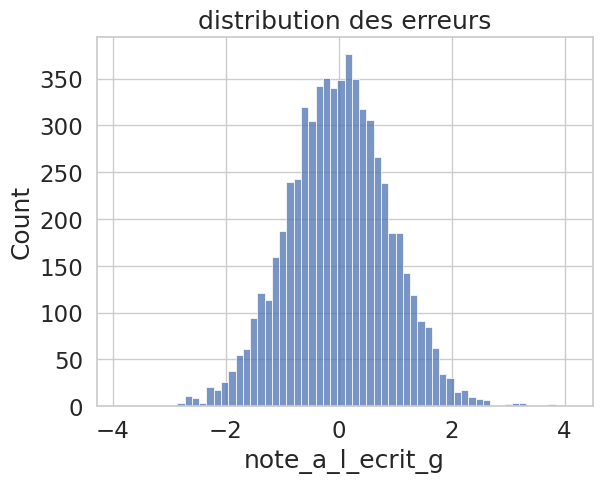


 test de Normalité des erreurs


Interprétation du test:
H0 : La série suit une loi Normale
H1 : La série ne suit pas une loi Normale
Étant donné que la p-values est inférieure au niveau de signification alpha = 0.05 ,
on doit rejeter l'hypothèse nulle H0 et retenir l'hypothèse H1.
Le risque de rejeter l'hypothèse nulle H0 alors qu'elle est vraie est inferieur à  1.47 %




In [15]:
data_reg_ips_sex_ulis = college2022.copy()
data_reg_ips_sex_ulis.drop(columns=['secteur','va_de_la_note_g','3eme_filles','3eme_total'],inplace=True)
reg_lin_ips_sex_ulis = perso_reg_lin.regression_lineaire(data=data_reg_ips_sex_ulis,colonne_cible='note_a_l_ecrit_g',intercept=True)

In [16]:
college2022['valeur_predite_reg_lin'] = reg_lin_ips_sex_ulis.predict(college2022[['ips','pourcentage_ulis_3ieme','pourcentage_fille']])
college2022['différence_reglin_note'] = college2022['note_a_l_ecrit_g']-college2022['valeur_predite_reg_lin']

In [17]:
college2022['différence_va_reglin'] = college2022['va_de_la_note_g']-college2022['différence_reglin_note']

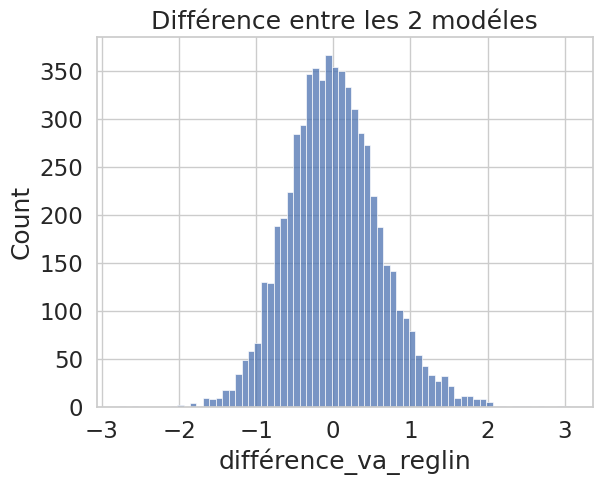

In [18]:
# difference entre les modeles
fig,ax =plt.subplots()
sns.histplot(college2022,x='différence_va_reglin',ax=ax)
ax.set_title('Différence entre les 2 modéles')
plt.show()
del fig,ax

Mon modèle a l'air assez proche du modèle utilisé par la VA. Il faut noter un écart de plus ou moins un point en moyenne entre les 2.

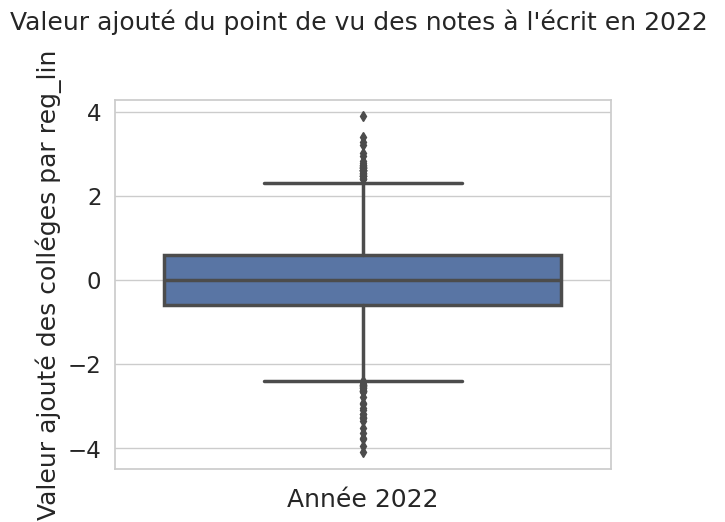

In [19]:
fig,ax = plt.subplots()
sns.boxplot(data=college2022, y="différence_reglin_note",ax=ax)
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit en 2022 ",pad=50)
ax.set_ylabel("Valeur ajouté des colléges par reg_lin")
ax.set_xlabel("Année 2022")
plt.show()

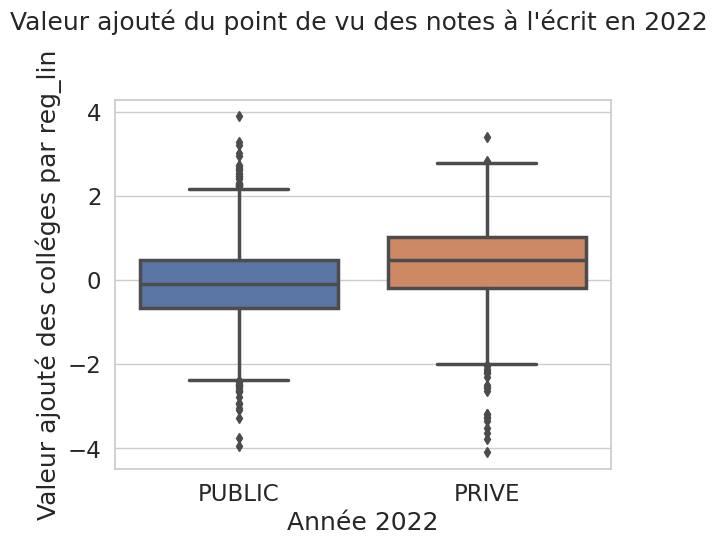

In [20]:
fig,ax = plt.subplots()
sns.boxplot(data=college2022,x='secteur', y="différence_reglin_note",ax=ax)
ax.set_title("Valeur ajouté du point de vu des notes à l'écrit en 2022 ",pad=50)
ax.set_ylabel("Valeur ajouté des colléges par reg_lin")
ax.set_xlabel("Année 2022")
plt.show()

Je n'arrive pas à faire mieux que l'indicateur du gouvernment. Le modéle utilisé pour calculer la VA à l'air d'être une regression linéaire avec plus de données.<br>
La Valeur ajouté en sortie n'est pas répartie de façon normale. ce qui me mets un doute sur la pertinence de leur modéle.<br>
